<h1><center>Сегментация изображений</center></h1>

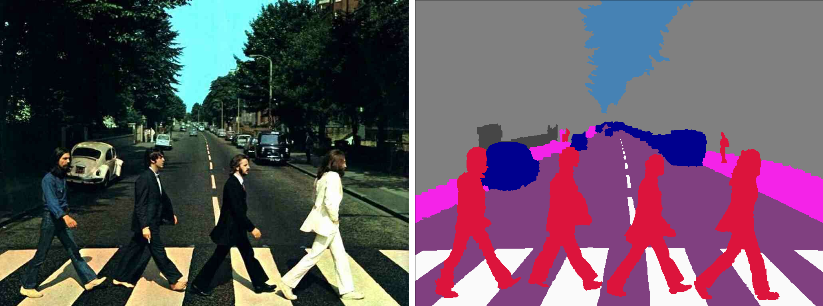

## План занятия:

* Что такое сегментации изображений
* Где данная технология применяется
* Методы сегментации
* Архитектура U-net
* Подготовка датасета
* Обучение модели
* Тестирование


<h1><center>Теория</center></h1>

На данный момент мы находимся в ситуации, когда глубокое обучение оказывается очень успешным при работе с изображениями как данными, и в настоящее время получается так, что оно во многих случаях работает даже лучше, чем люди. Наиболее важные проблемы, которыми люди интересовались в решении задач компьютерного зрения - классификация изображений, детекция объектов и сегментация в порядке увеличения сложности. 
В результате решения задачи классификации мы хотим получить все классы объектов на изображении. В детектировании объектов мы идем на шаг дальше и работаем над локализацией объекта на изображении. В сегментации решается задача нахождения точной границы объекта на изображении.

## Что такое сегментация

Сегментация - это процесс, благодаря которому каждый пиксель изображения относится в определенный класс (попиксельная классификация). Существует два вида сегментаций: семантическая и инстанс-сегментация.
Семантическая сегментация изображения означает присвоение каждому пикселю определенной метки. В этом заключается главное отличие от классификации, где всему изображению ставится в соответствие только одна метка. Сегментация работает со множеством объектов одного класса как с единым целым.
Инстанс-сегментация делает тоже самое, но дополнительно обрабатывает каждый отдельный найденный объект одного класса как различные объекты. Решение задачи инстанс-сегментации сложнее, чем семантическая сегментация.
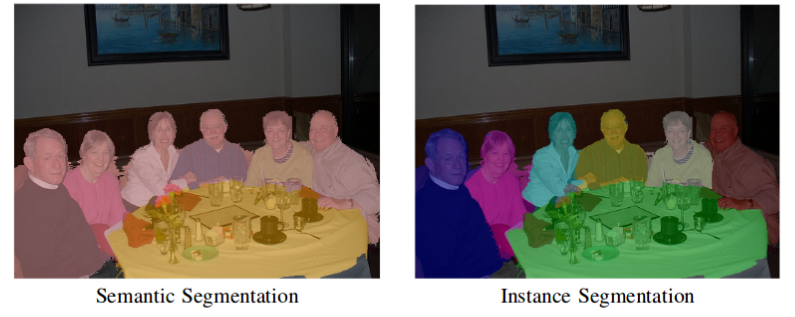

## Применение алгоритмов сегментации в реальной жизни

1) Распознавание рукописного текста:

В [работе](https://arxiv.org/pdf/1906.05229.pdf) 2019 года показано как с помощью U-net находятся линии и текст от руки.
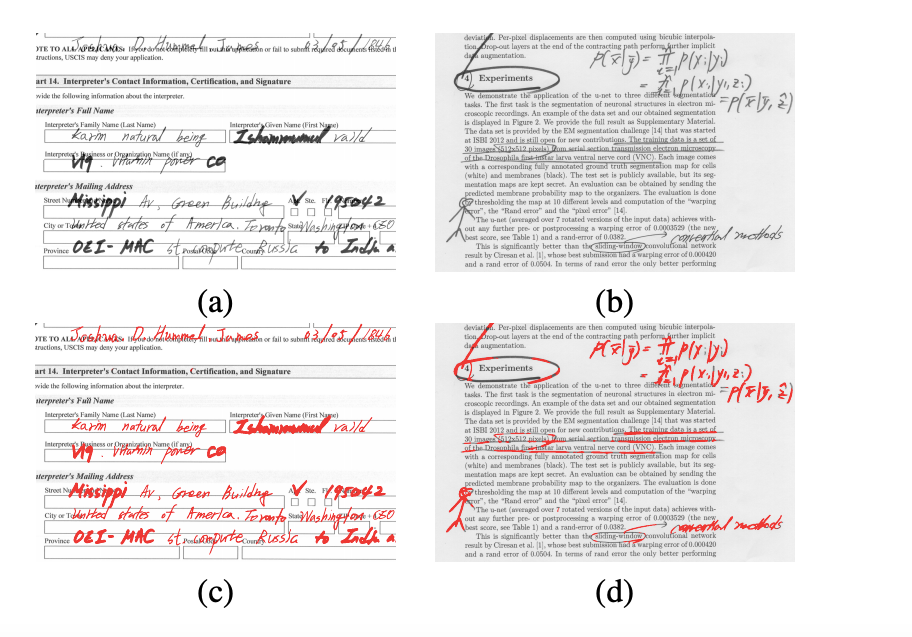

2) Сегментация медицинских изображений

Первое упоминание архитектуры, которую мы сегодня будем разбирать было сделано в этой [статье](https://arxiv.org/abs/1505.04597). И касалось оно сегментации медицинских изображений. С помощью этих методов можно анализировать например состояние внутренних органов: проверять их целостность и объем (трехмерная семантическая сегментация), находить опухоли.
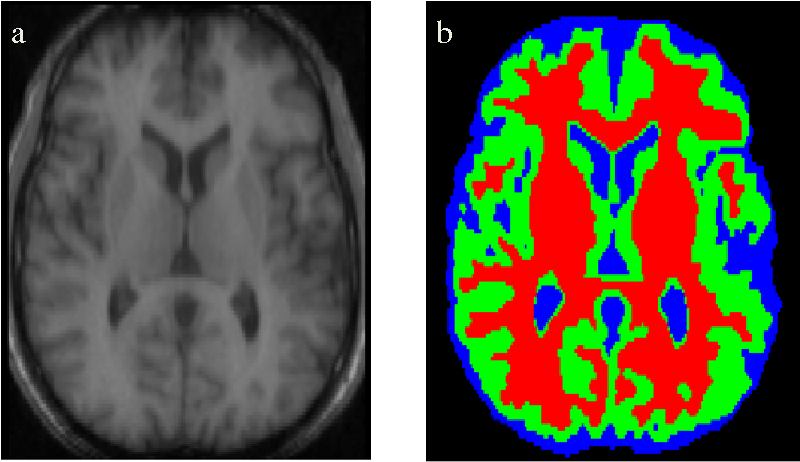

3) Режим portrait mode 

В этом режиме на смартфонах можно отделить передний план от фона. И, например, заблюрить фон, сфокусировав внимание на персоне в кадре. Эта технология широко применяется в смартфонах от [Apple](https://developer.apple.com/documentation/avfoundation/avportraiteffectsmatte) и [Google](https://www.theverge.com/2018/3/14/17120996/google-pixel-phone-portrait-mode-ai-image-segmentation-open-source).
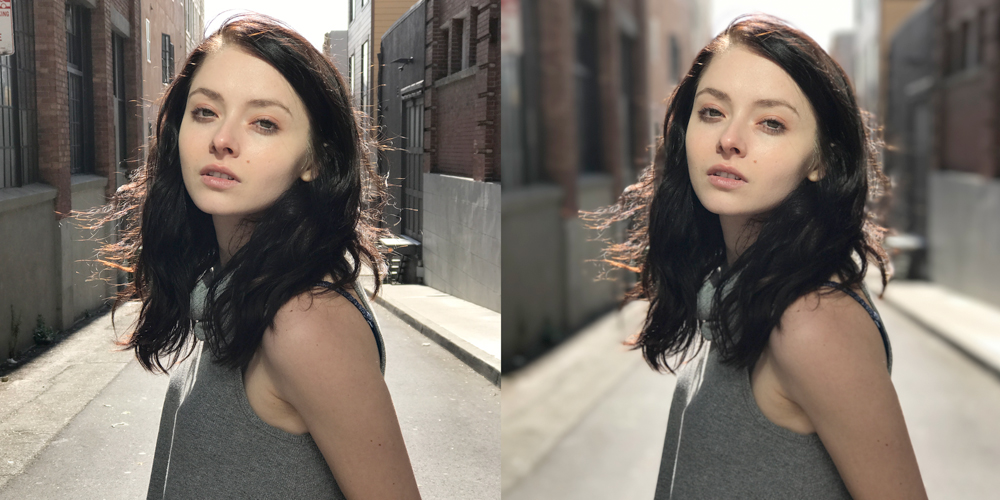


4) Индустрия моды

Используется для извлечения с кадра элементов одежды. Таким образом пользователь может примерять разную одежду онлайн. Например, стартап из Минска [WannaBy](https://wanna.by/), с которыми [Lamoda](https://vc.ru/services/79510-lamoda-zapustila-v-prilozhenii-na-ios-virtualnuyu-primerku-krossovok-ot-belorusskogo-ar-startapa-wannaby) и  многие итальянские компании сотрудничают по части онлайн примерки.
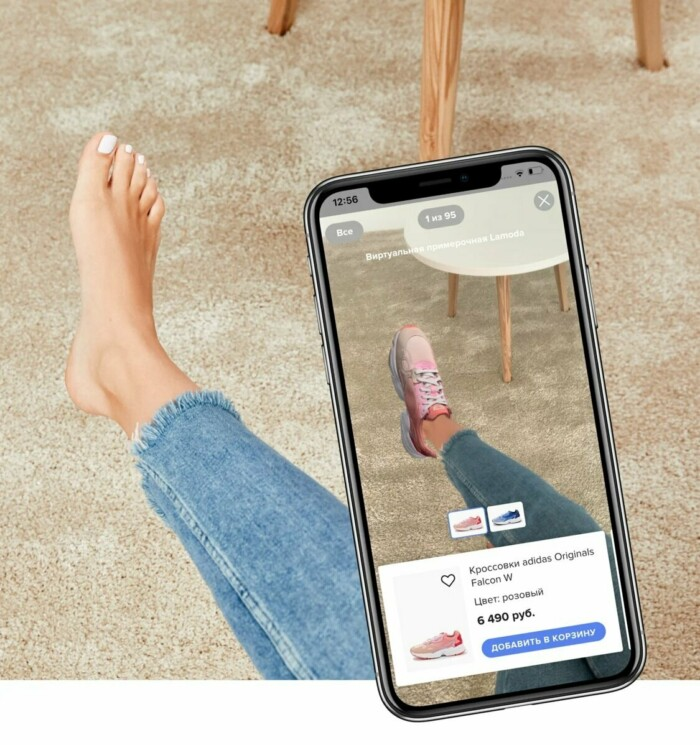

5) Автономное вождение

Здесь алгоритмы сегментации используются для обнаружения транспортных средств, пешеходов и других предметов, представляющих интерес. Затем результат сегментации используется для принятия решений по оптимальному управлению автопилотируемым транспортным средством. Как раз в таких системах очень важно понимать границы объектов.
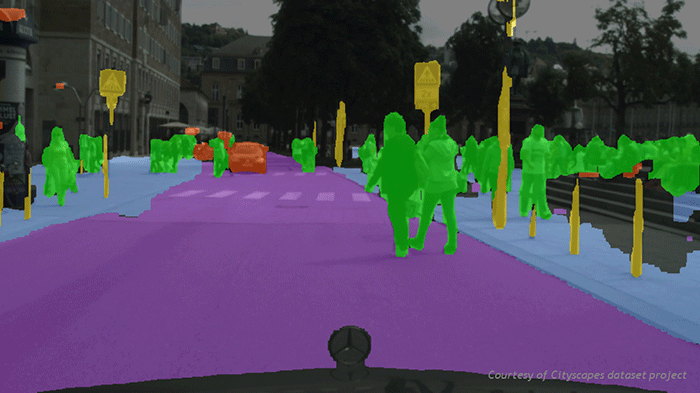

## Краткий обзор методов сегментации

Методы глубокого обучения позволяют добиваться хороших результатов в задаче семантической сегментации изображений. Здесь мы вкратце обсудим алгоритмы и популярные архитектуры моделей, которые применяются в решении задачи сегментации.

До применения глубокого обучения было разработано много алгоритмов решения задачи сегментации, таких как пороговое изображение, кластеризация K-средних, методы разбиения графа, Watershed и т.д. Самым простым методом можно считать метод порогового изображения. В данном подходе изображение сначала преобразовывают в одноканальное серое, а затем за счет выставления порогового значения превращают в двоичное изображение. Все эти алгоритмы работали достаточно посредственно. Но использование нейронных сетей изменило ситуацию.
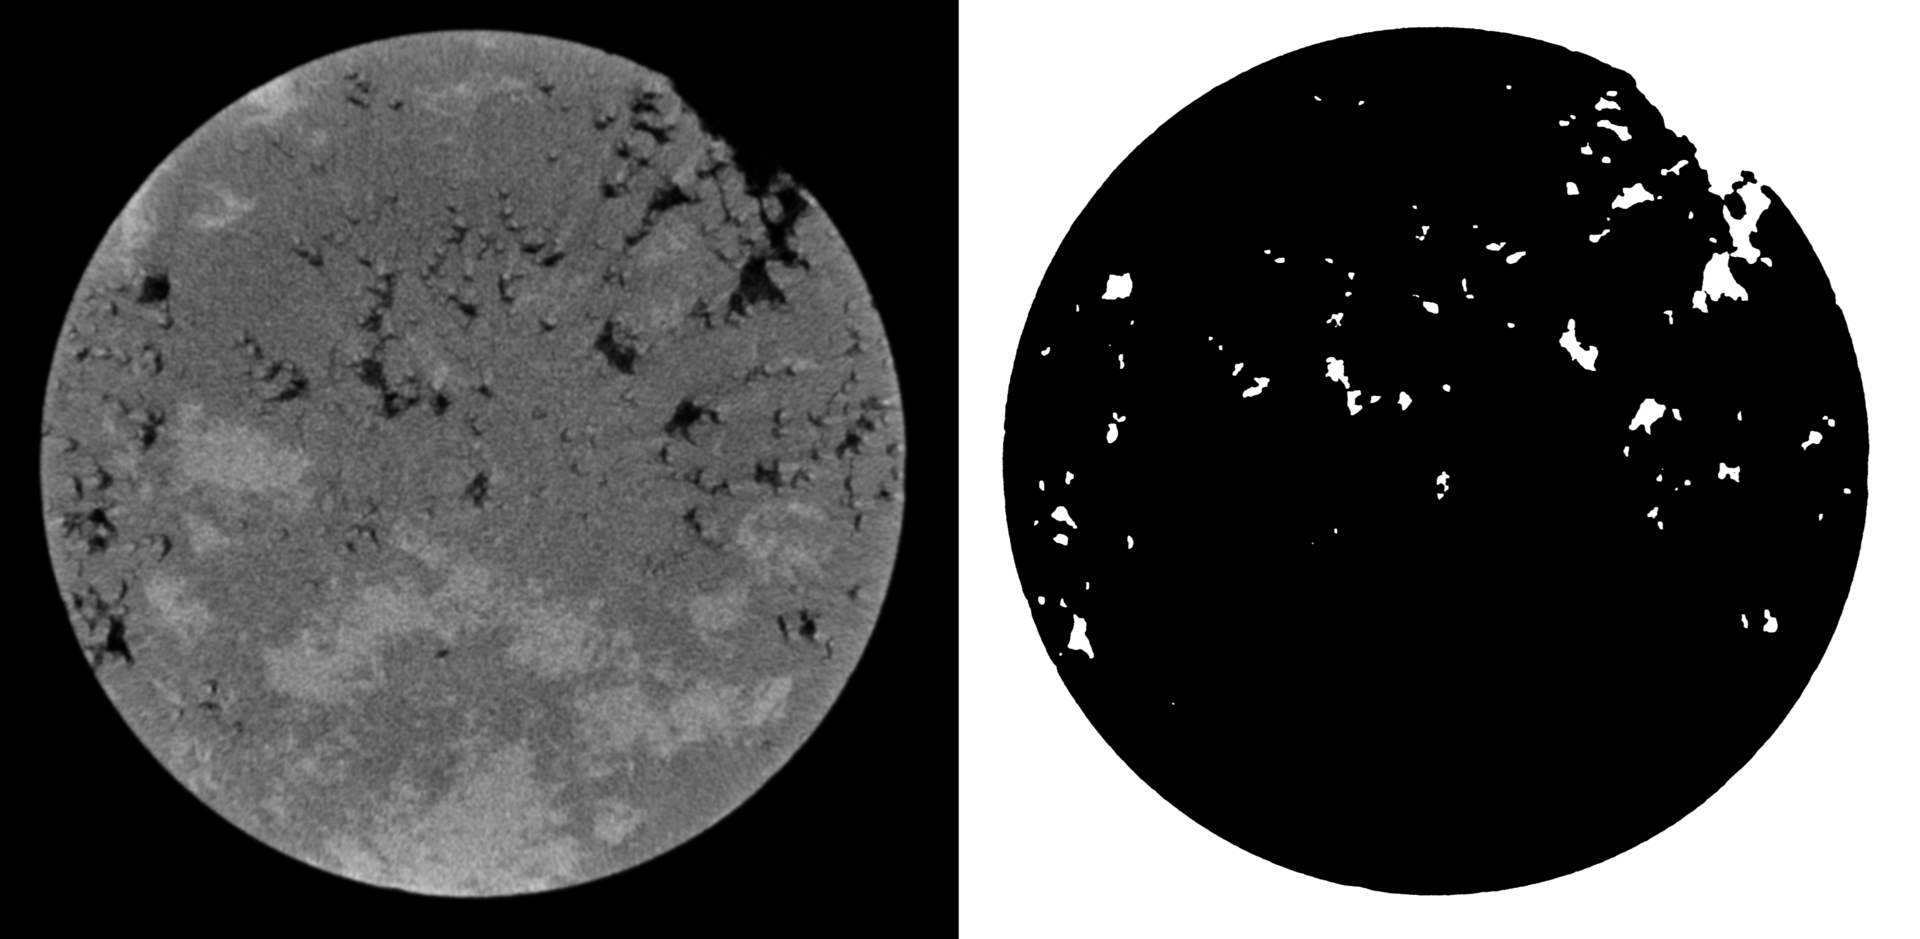

## Fully Convolutional Network

Одна из самых простых архитектур - это [FCN](https://towardsdatascience.com/review-fcn-semantic-segmentation-eb8c9b50d2d1) (Fully Convolutional Network). Это первая удачная попытка использования нейронной сети для задачи семантической сегментации. В этой архитектуре все слои сверточные.На выходе используется как правило один деконволюционный слой.
Одна из основных проблем - это низкое разрешение на выходе.
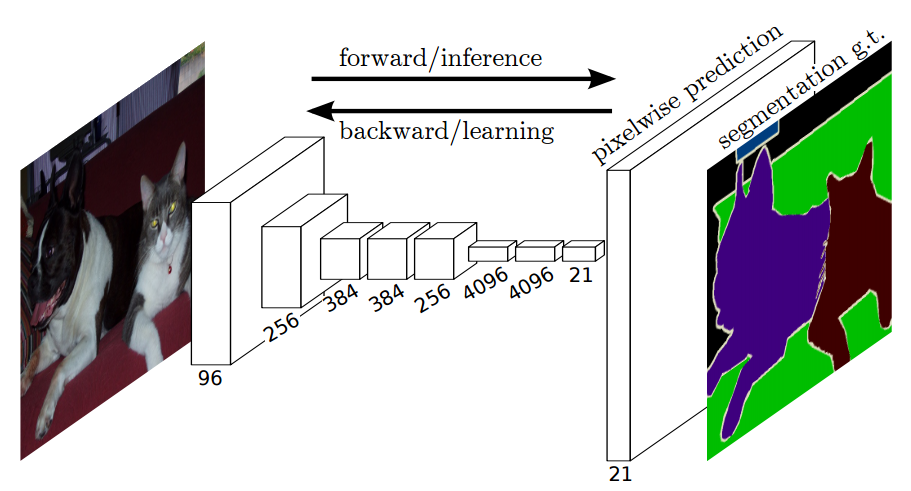



## Unet

Когда мы изучаем задачу сегментацию, Unet - это одна из базовых и наиболее используемых моделей для сегментации. Есть очень много имплементаций Unet, но давайте разберемся с оригинальной Unet.
Ее архитектура представлена на картинке ниже.
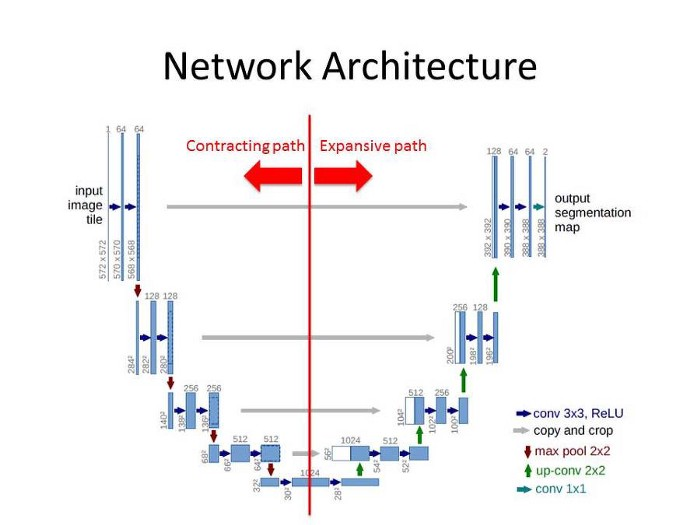

Архитектура unet может быть разделена на левую (уменьшающую размерность картинки) и правую (увеличивающую) части. 
Левая часть - это сверточная сеть. Два 3х3 сверточных слоя следуют за активационной функцией Relu последовательно(Sequentially) и после этого применяется 2x2 maxpool слой (на картинке красная стрелка).
В это время правая часть - то место где происходят действительно интересные вещи. Правая часть также имеет два 3х3 сверточных слоя, соединенные вместе (Sequentially), но нет привычных нам Relu активационной функции и MaxPool слоя. Вместо них - 2х2 транспонированный сверточный слой или деконволюционный (зеленая стрелка на изображении). Проходя по расширяющему пути, мы будем брать изображение (копию) из левой части и комбинировать с изображением из правой (серая стрелка на изображении). Помните, что последовательные 3х3 сверточные слои также используются в правой части. Поэтому вход для них будет комбинацией с изображения из левой части и прошлого слоя (комбинация половин белой и голубой коробки в левой части изображения). Итог работы нейронной сети - это выходная сегментационная карта.

## Реккурентные нейронные сети для семантической обработки

Существует такая [работа](https://imatge-upc.github.io/rsis/). В этой архитектуре левая часть мало чем отличается от строения Unet. А вот в правая представляет собой серию LSTM модулей, которые соединены в цепочку с повышающими размерность слоями.
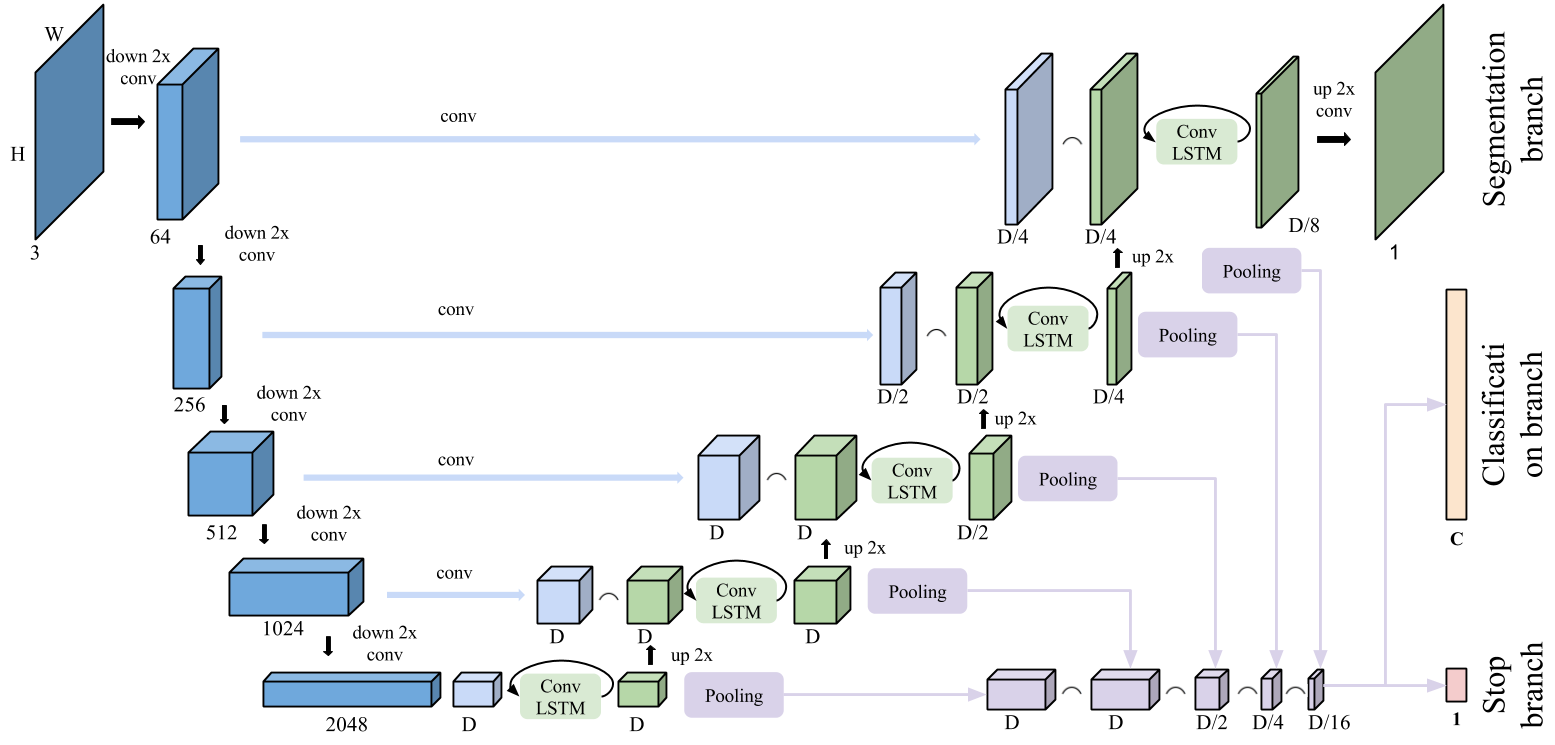

## Другие популярные архитектуры

* [Pyramid Scene Parsing Network](https://github.com/Lextal/pspnet-pytorch)
* [DeepLabV3](https://arxiv.org/abs/1706.05587)
* [Mask-RCNN](https://kharshit.github.io/blog/2019/08/23/quick-intro-to-instance-segmentation)

## Оценка качества

И конечно в любой сети нам нужна какая-то оценка качества наших моделей.

Обычно в задачах, решаемых с помощью нейронных сетей, настройка процесса обучения основывается большей частью на опыте исследователя и некоторых эвристиках. Например, для задач сегментации изображений чаще всего применяются функции потерь, основанные на оценке совпадения форм распознанных зон, так называемые Intersection over Union.

Интуитивно, основываясь на понимании поведения и результатах исследований, такого рода функции дадут лучший результат, чем те, которые не заточены под изображения, как например кросс-энтропийные. Тем не менее, эксперименты в поисках оптимального варианта для такого типа задач в целом и каждой задачи индивидуально продолжаются.
https://habr.com/ru/company/ods/blog/488852/

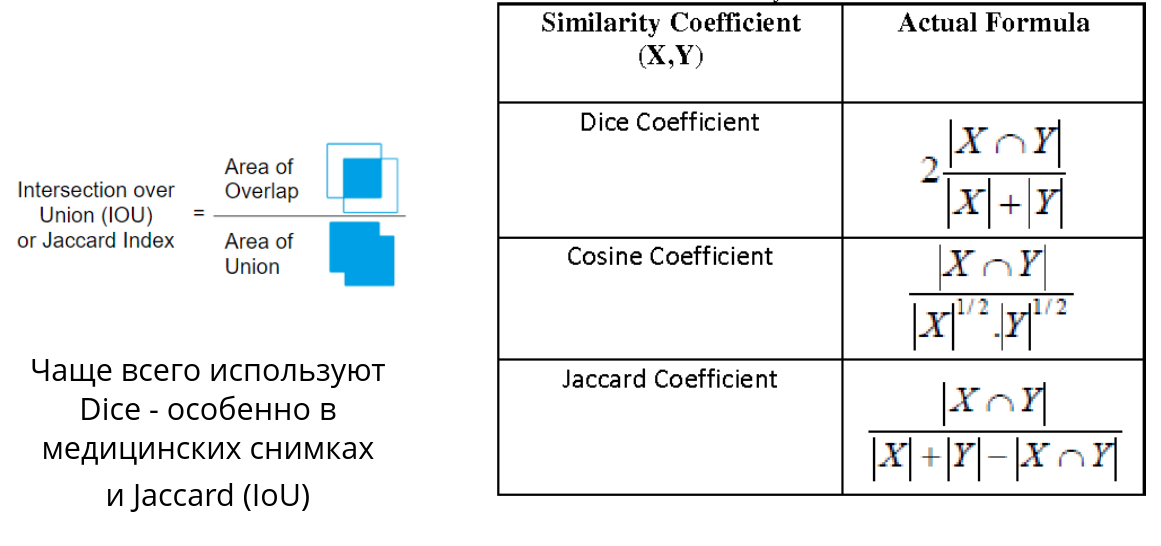

<h1><center>Практическая часть</center></h1>

Что ж, перейдем от теории к практике. Давайте использовать PyTorch и закодим Unet, описание которой дано выше ([оригинальная статья](https://arxiv.org/pdf/1505.04597.pdf))

## Часть 1. Создание модели

Как мы отметили ранее, в архитектуре присутствует 3х3 двойной сверточный слой следующий за активационной функцией Relu в обеих частях сетки.


Шаг 1.

Создадим функцию conv_block(), параметры которой входные и выходные параметры каналов. Внутри функции последовательные сверточные слои с ядром 3 (3х3) каждый предшествует Relu активационной функции и для лучшей сходимости слои BatchNorm2d:

In [1]:
import torch
import torch.nn as nn

def conv_block(in_channels,  out_channels):
    conv = nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=3),
        nn.ReLU(),
        nn.BatchNorm2d(num_features=out_channels),
        nn.Conv2d(in_channels, out_channels, kernel_size=3),
        nn.ReLU(),
        nn.BatchNorm2d(num_features=out_channels)
    )
    return conv

Шаг 2.

Создадим класс Unet() и сделаем слои левой части и maxpool слои. В каждом слое мы используем conv_block(). Давайте назовем  слои conv_down (5 слоев в левой части): 

Сделаем внутри класса функцию forward(), которой мы отправим входное изображение в левую часть:

Вот, отлично. Мы создали левую часть нейронной сети. Осталось сделать правую часть.

Шаг 4.

Теперь давайте задекларируем 4 слоя правой части и последнюю 1х1 conv в нашей функции __init__() класса. Вместо maxpool функции мы будем использовать 2х2 transpose convolution, которая будет повышать нашу размерность:

Шаг 5.

Как мы видим, в архитектуре входное изображение в правой части - это комбинация изображения с левой части
и с предыдущего слоя. Но для комбинации изображений они должны быть одинаковых размеров. Поэтому давайте создадим функцию crop_tensor() для вырезания этих изображений. Внутри этой функции мы подразумеваем, что наши изображения - это тензоры.

Что происходит в функции crop_tensor() ?

tensor = изображение с левой части, которое необходимо обрезать
target tensor = изображение в правой части, которое сопоставляется с вырезанным левым изображением

Возьмем последний размер обоих тензоров target_size и tensor_size, т.к. их высота и ширина одинаковы. 
Например: x=torch.Size([1,512,64,64]), таким образом x[2] = 64

Теперь мы имея размеры обоих изображений, вычтем размер меньшего тензора из большего. Предположим
target_size = 56 и tensor_size = 64 -> delta(разница между размерами) будет 8.

Но мы ведь будем вырезать изображение из всех углов 'height' * 'width', поэтому мы разделим delta на 2. 
Таким образом, height и width могут быть вырезаны равно:
    8 => h * w=4 * 4

теперь вернем вырезанный тензор
[:,:,] = все измерения
[delta:tensor_size-delta, delta:tensor_size-delta] = вырезанное изображение

[4:64-4, 4:64-4] => 4:60, 4:60 
в примере выше нам необходима картинка 56х56

На картинке ниже показан пример вырезанной высоты:

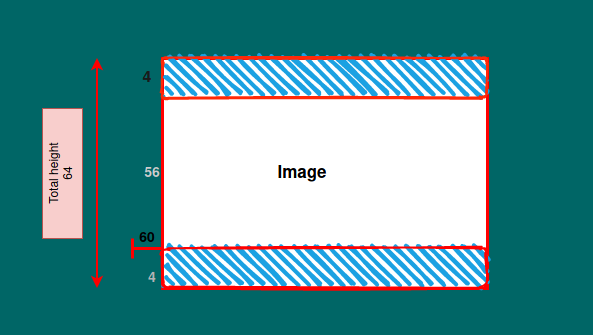

In [2]:
def crop_tensor(target_tensor, tensor):
    target_size = target_tensor.size()[2]
    tensor_size = tensor.size()[2]
    delta = tensor_size - target_size
    delta = delta // 2
    
    return tensor[:,:, delta:tensor_size-delta, delta:tensor_size-delta]

Шаг 6.

Теперь допишем наш forward правой части.

Сначала Транспонированный слой x берет входное x9 последнего слоя левой стороны. 
Теперь комбинируем изображение x и изображение из слоя во входной части.
Но т.к. размеры изображений разные, мы применяем crop_tensor().

print(x7.size()) : torch.Size([1,512,64,64])
print(x.size())  : torch.Size([1,512,56,64])

Комбинируем оба изображения используя torch.cat() и подставляем в up_conv():

Теперь для вида запишем наши созданые ранее функции внутрь класса. В итоге наш класс Unet выглядит следующим образом:

In [3]:
import torch
import torch.nn as nn

class UNet(nn.Module):

    def __init__(self, num_classes):
        super(UNet, self).__init__()
        self.num_classes = num_classes

        # Левая сторона (Путь уменьшения размерности картинки)
        self.down_conv_11 = self.conv_block(in_channels=3, out_channels=64)
        self.down_conv_12 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.down_conv_21 = self.conv_block(in_channels=64, out_channels=128)
        self.down_conv_22 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.down_conv_31 = self.conv_block(in_channels=128, out_channels=256)
        self.down_conv_32 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.down_conv_41 = self.conv_block(in_channels=256, out_channels=512)
        self.down_conv_42 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.middle = self.conv_block(in_channels=512, out_channels=1024)
        
        # Правая сторона (Путь увеличения размерности картинки)
        self.up_conv_11 = nn.ConvTranspose2d(in_channels=1024, out_channels=512, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.up_conv_12 = self.conv_block(in_channels=1024, out_channels=512)
        self.up_conv_21 = nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.up_conv_22 = self.conv_block(in_channels=512, out_channels=256)
        self.up_conv_31 = nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.up_conv_32 = self.conv_block(in_channels=256, out_channels=128)
        self.up_conv_41 = nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.up_conv_42 = self.conv_block(in_channels=128, out_channels=64)
        
        self.output = nn.Conv2d(in_channels=64, out_channels=num_classes, kernel_size=3, stride=1, padding=1)
        self.softmax = nn.Softmax()
    
    @staticmethod
    def conv_block(in_channels, out_channels):
        block = nn.Sequential(nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=out_channels),
                                    nn.Conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=out_channels))
        return block
    
    @staticmethod
    def crop_tensor(target_tensor, tensor):
        target_size = target_tensor.size()[2]
        tensor_size = tensor.size()[2]
        delta = tensor_size - target_size
        delta = delta // 2

        return tensor[:,:, delta:tensor_size-delta, delta:tensor_size-delta]


    def forward(self, X):
        # Проход по левой стороне
        x1 = self.down_conv_11(X) # [-1, 64, 256, 256]
        x2 = self.down_conv_12(x1) # [-1, 64, 128, 128]
        x3 = self.down_conv_21(x2) # [-1, 128, 128, 128]
        x4 = self.down_conv_22(x3) # [-1, 128, 64, 64]
        x5 = self.down_conv_31(x4) # [-1, 256, 64, 64]
        x6 = self.down_conv_32(x5) # [-1, 256, 32, 32]
        x7 = self.down_conv_41(x6) # [-1, 512, 32, 32]
        x8 = self.down_conv_42(x7) # [-1, 512, 16, 16]
        
        middle_out = self.middle(x8) # [-1, 1024, 16, 16]

        # Проход по правой стороне
        x = self.up_conv_11(middle_out) # [-1, 512, 32, 32]
        y = self.crop_tensor(x, x7)
        x = self.up_conv_12(torch.cat((x, y), dim=1)) # [-1, 1024, 32, 32] -> [-1, 512, 32, 32]
        
        x = self.up_conv_21(x) # [-1, 256, 64, 64]
        y = self.crop_tensor(x, x5)
        x = self.up_conv_22(torch.cat((x, y), dim=1)) # [-1, 512, 64, 64] -> [-1, 256, 64, 64]
        
        x = self.up_conv_31(x) # [-1, 128, 128, 128]
        y = self.crop_tensor(x, x3)
        x = self.up_conv_32(torch.cat((x, y), dim=1)) # [-1, 256, 128, 128] -> [-1, 128, 128, 128]
        
        x = self.up_conv_41(x) # [-1, 64, 256, 256]
        y = self.crop_tensor(x, x1)
        x = self.up_conv_42(torch.cat((x, y), dim=1)) # [-1, 128, 256, 256] -> [-1, 64, 256, 256]
        
        output = self.output(x) # [-1, num_classes, 256, 256]
        output = self.softmax(output)

        return output

## Часть 2. Подготовка датасета

В обучении нашей модели мы будем использовать датасет для автопилотируемых машин.
Скачать весь датасет (~3 Гб) можно по этой ссылке: https://www.kaggle.com/kumaresanmanickavelu/lyft-udacity-challenge

После скачивания создаем внутри проекта папку 'Semantic segmentation for Self-driving Cars' и разорхивируем туда все содержимое архива. <br>Если вы захотите назвать папку по-другому - замените везде в коде ниже 'Semantic segmentation for Self-driving Cars' на ваше название.

Шаг 1.

Начнем с того, что посмотрим на наш датасет. Внутри куча схожих по названию папок, каждая из которых содержит картинки. 
Но мы можем выделить в этом датасете два вида картинок. 
<br>1) Это обычные цветные картинки.
Например dataA/dataA/CameraRGB/02_00_000.png
<br>2) И есть связанные с ними картинки, разбитые на области с одинаковыми яркостями пикселей.
<br>Например dataA/dataA/CameraSeg/02_00_000.png, в ней все тоже самое, что и в первой, но  она просегментирована.

И еще заметим, что нигде в датасете нет явной информации о классах. Мы должны дать им имена сами.

Начнем писать код

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

Найдем уникальные значения пискселей на картинке, и каждое такое значение будет соответсвовать целому классу.

In [5]:
np.unique(plt.imread('Semantic segmentation for Self-driving Cars/dataA/dataA/CameraSeg/02_00_000.png')[:,:,0]*255)

array([ 0.,  1.,  2.,  3.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
      dtype=float32)

В итоге видим, что у нас 13 классов. Вы можете самостоятельно поотображать семантическую маску 
для каждого класса используя код ниже:

In [37]:
labels = ['Unlabeled','Building','Fence','Other',
                'Pedestrian', 'Pole', 'Roadline', 'Road',
                'Sidewalk', 'Vegetation', 'Car','Wall',
                 'Traffic sign']

[  0 255]


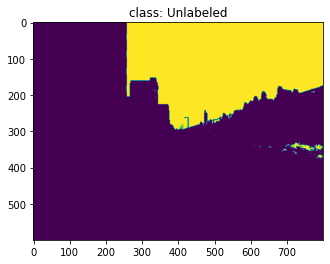

[  0 255]


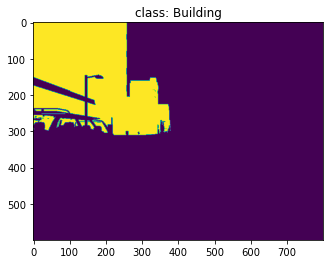

[  0 255]


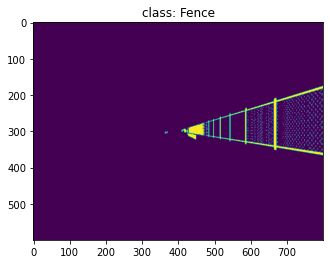

[  0 255]


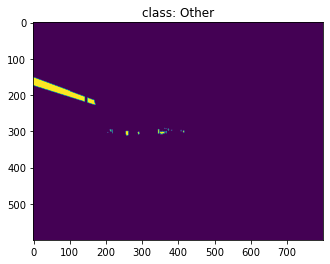

[0]


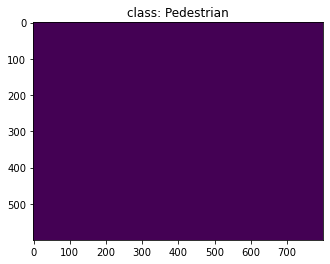

[  0 255]


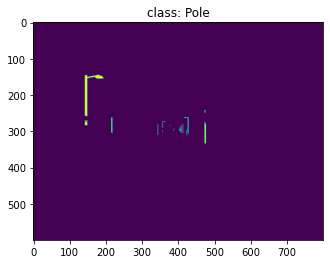

[  0 255]


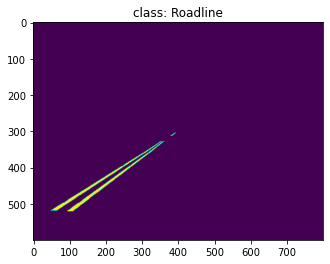

[  0 255]


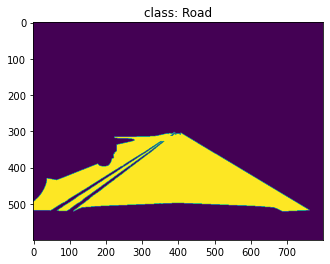

[  0 255]


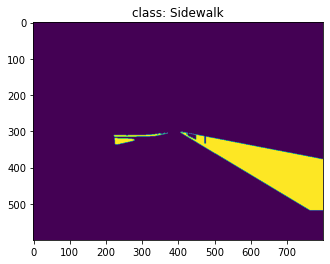

[  0 255]


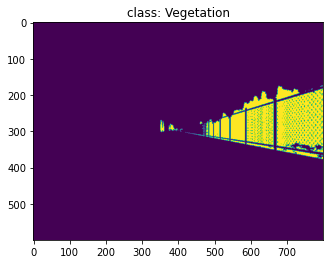

[  0 255]


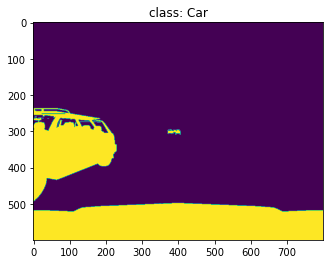

[  0 255]


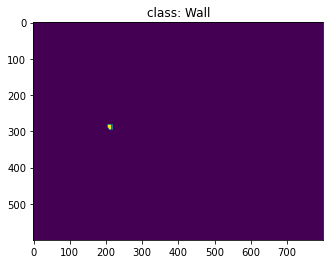

[  0 255]


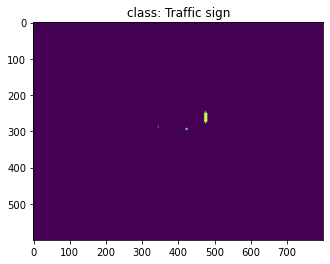

In [39]:
for i in range(13):
    mask = plt.imread('Semantic segmentation for Self-driving Cars/dataA/dataA/CameraSeg/02_00_000.png')*255
    mask = np.where(mask == i, 255, 0)
    mask = mask[:,:,0]
    print(np.unique(mask))
    plt.title(f'class: {labels[i]}')
    plt.imshow(mask)
    plt.show()

Но а я лишь скажу что наши классы называются следующим образом и идут в таком порядке:

In [7]:
labels = ['Unlabeled','Building','Fence','Other',
                'Pedestrian', 'Pole', 'Roadline', 'Road',
                'Sidewalk', 'Vegetation', 'Car','Wall',
                 'Traffic sign']

Шаг 2.

Теперь приведем наш датасет к удобному виду, для этого сначала разделим все на два списка с rgb картинками и seg.

In [8]:
cameraRGB = []
cameraSeg = []
for root, dirs, files in os.walk('Semantic segmentation for Self-driving Cars'):
    for name in files:
        f = os.path.join(root, name)
        if 'CameraRGB' in f:
            cameraRGB.append(f)
        elif 'CameraSeg' in f:
            cameraSeg.append(f)
        else:
            break

Теперь завернем эти два списка в DataFrame из библиотеки pandas.
В итоге выведем первые пять записей из получившегося датафрейма:

In [9]:
df = pd.DataFrame({'cameraRGB': cameraRGB, 'cameraSeg': cameraSeg})
# Отсортируем  датафрейм по значениям
df.sort_values(by='cameraRGB',inplace=True)
# Используем функцию,
# лагодаря которой индексация значений 
# будет начинаться с 0.
df.reset_index(drop=True, inplace=True)
# Выведем первые ять значений нашего датафрейма
print(df.head(5))

                                           cameraRGB  \
0  Semantic segmentation for Self-driving Cars/da...   
1  Semantic segmentation for Self-driving Cars/da...   
2  Semantic segmentation for Self-driving Cars/da...   
3  Semantic segmentation for Self-driving Cars/da...   
4  Semantic segmentation for Self-driving Cars/da...   

                                           cameraSeg  
0  Semantic segmentation for Self-driving Cars/da...  
1  Semantic segmentation for Self-driving Cars/da...  
2  Semantic segmentation for Self-driving Cars/da...  
3  Semantic segmentation for Self-driving Cars/da...  
4  Semantic segmentation for Self-driving Cars/da...  


Шаг 3. 

Теперь обернем все в кастомный датасет для удобной работы в PyTorch.

In [10]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
from torch.nn import functional as F

Создадим класс для кастомного датасета:

In [11]:
class CustomDatasetFromImages(Dataset):
    def __init__(self, data_info):
        # Подаем наш подготовленный датафрейм
        self.data_info = data_info
        
        # Разделяем датафрейм на rgb картинки 
        self.image_arr = self.data_info.iloc[:,0]
        # и на сегментированные картинки
        self.label_arr = self.data_info.iloc[:,1]
        
        # Количество пар картинка-сегментация
        self.data_len = len(self.data_info.index)
    def __getitem__(self, index):
        # Читаем картинку и сразу же представляем ее в виде numpy-массива 
        # размера 600х800 float-значний
        img = Image.open(self.image_arr[index])
        img = img.resize((256,256))
        img = np.asarray(img).astype('float')
        # Нормализуем изображение в значениях [0,1]
        img = torch.as_tensor(img)/255    
        # unsqueeze - меняет размерность img c (600, 800, 3) -> (1, 600, 800, 3),
        # т.е. оборачивает картинку в батч размером в одну картинку
        img = img.permute(2,0,1)
        # Мы используем функцию интерполяции для того,
        # чтобы поменять рамерность картинки с 800х600 на 256х256
        #img = F.interpolate(input=img, size=256, align_corners=False, mode='bicubic')
        
        
        # итаем сегментированную картинку и сразу же представляем ее в виде numpy-массива 
        # размера 600х800 float-значний
        lab = np.asarray(plt.imread(self.label_arr[index]))[:,:,0]*255
        lab = torch.as_tensor(lab).unsqueeze(0)
        
        
        
        
        # делаем ресайз картинки на 256х256
        # Для этого используем функцию interpolate
        ### Что бы ресайзить и высоту и ширину картинки, нужно перед interpolate
        ### пороизвести unsqueeze над тензором, и squeeze после.
        lab = lab.unsqueeze(0)
        lab = F.interpolate(input=lab, size=256, mode='nearest')
        
        lab=lab.squeeze(0).squeeze(0)
        
        
        
        return (img.float(), lab.float())

    def __len__(self):
        return self.data_len

Затем разделим наш датасет на тренировочную и тестовую выборки.
И обернем их в наш кастомный класс.

In [12]:
from sklearn.model_selection import train_test_split

# 70 % в тренировочную выборку, 30 - в тестовую
X_train, X_test = train_test_split(df,test_size=0.3)

# Упорядочиваем индексацию
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

# Оборачиваем каждую выборку в наш кастомный датасет
train_data = CustomDatasetFromImages(X_train)
test_data = CustomDatasetFromImages(X_test)

И теперь уже обернем то, что получилось в известные нам в pytorch даталоадеры:

In [13]:
train_data_loader = DataLoader(train_data,batch_size=8,shuffle=True)
test_data_loader = DataLoader(test_data,batch_size=4,shuffle=False)

## Часть 3. Обучение

У нас есть готовые данные и определенная сеть, которую мы хотим обучить. Пришло время построить базовый обучающий конвейер.

Определим скорость обучения и количество эпох:

In [14]:
learning_rate = 0.001
epochs = 5

Выберем устройство,на котором будем обучать нашу модель:

In [15]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

Определим нашу модель Unet для 13 классов:

In [16]:
Umodel = UNet(num_classes=13).to(device)

Под обучением мы понимаем скармливание целевой функции оптимизирующей функции. Поэтому выберем оптимизирующую функцию и функцию потерь (целевая функция):

In [17]:
optimizer = torch.optim.Adam(Umodel.parameters())

In [18]:
def dice_loss(output, target, weights=None, ignore_index=None):
    """
    output : NxCxHxW Variable
    target :  NxHxW LongTensor
    weights : C FloatTensor
    ignore_index : int index to ignore from loss
    """
    eps = 0.0001

    output = output.float().exp()
    target = target.type(torch.int64)
    encoded_target = output.detach() * 0
    if ignore_index is not None:
        mask = target == ignore_index
        target = target.clone()
        target[mask] = 0
        encoded_target.scatter_(1, target.unsqueeze(1), 1)
        mask = mask.unsqueeze(1).expand_as(encoded_target)
        encoded_target[mask] = 0
    else:
        encoded_target.scatter_(1, target.unsqueeze(1), 1)

    if weights is None:
        weights = 1

    intersection = output * encoded_target
    numerator = 2 * intersection.sum(0).sum(1).sum(1)
    denominator = output + encoded_target

    if ignore_index is not None:
        denominator[mask] = 0
    denominator = denominator.sum(0).sum(1).sum(1) + eps
    loss_per_channel = weights * (1 - (numerator / denominator))

    return loss_per_channel.sum() / output.size(1)

In [19]:
class SoftDiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(SoftDiceLoss, self).__init__()

    def forward(self, logits, targets):
        smooth =1
        num = targets.size(0)
        probs = logits
        m1 = probs.view(num, -1)
        m2 = targets.view(num, -1)
        intersection = (m1 * m2)

        score =(2. * intersection.sum(1) + smooth) / (m1.sum(1) + m2.sum(1) + smooth)
        #print(score.sum())
        score =1 - score.sum() / num
        return score
    # This function has only a single output, so it gets only one gradient
    def backward(self, grad_output):

        input, target = self.saved_variables
        grad_input = grad_target = None

        if self.needs_input_grad[0]:
            grad_input = grad_output * 2 * (target * self.union - self.inter) \
                         / (self.union * self.union)
        if self.needs_input_grad[1]:
            grad_target = None

        return grad_input, grad_target

Определим количество шагов внутри одной эпохи:

In [20]:
total_steps = len(train_data_loader)
print(f"{epochs} epochs, {total_steps} total_steps per epoch")

5 epochs, 875 total_steps per epoch


In [21]:
criterion=SoftDiceLoss()

Запускаем сам процесс обучения:

In [22]:
#Импортируем библиотеку time для расчета, сколько времени у нас уходит на одну эпоху
import time
from torch.autograd import Variable

# Полезная функция для детектирования аномалий в процессе обучения
#torch.autograd.set_detect_anomaly(True)

# запускаем главный тренировочный цикл
epoch_losses = []
for epoch in range(epochs):
    time1 = time.time()
    epoch_loss = []
    for batch_idx, (data, labels) in enumerate(train_data_loader):
        
        data, labels = data.to(device), labels.to(device)        
#         data = data.to(device)
#         labels = labels.to(device)
        
        optimizer.zero_grad()
        
        #print(data.shape)
        #print(labels.shape)
        
        outputs = Umodel(data)
        
        
        
        #print(outputs.shape)
        
        
        #loss = nn.CrossEntropyLoss(outputs,labels)# - torch.log(SoftDiceLoss(outputs, labels))
        loss = dice_loss(outputs, labels)
        
        
        loss.backward()
        optimizer.step()
        
        epoch_loss.append(loss.item())
        
        if batch_idx%200==0:
            print(f'batch index : {batch_idx} | loss : {loss.item()}')

    print(f'Epoch {epoch+1}, loss: ',np.mean(epoch_loss))
    time2 = time.time()
    print(f'Spend time for 1 epoch: {time2-time1} sec')
    
    epoch_losses.append(epoch_loss)

<ipython-input-3-35eb63d9b5d5>:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


batch index : 0 | loss : 0.8690256476402283
batch index : 200 | loss : 0.7435423135757446
batch index : 400 | loss : 0.7391309142112732
batch index : 600 | loss : 0.7398405075073242
batch index : 800 | loss : 0.7334954738616943
Epoch 1, loss:  0.74281537934712
Spend time for 1 epoch: 386.4494216442108 sec
batch index : 0 | loss : 0.7340330481529236
batch index : 200 | loss : 0.7307274341583252
batch index : 400 | loss : 0.7374868392944336
batch index : 600 | loss : 0.7356030941009521
batch index : 800 | loss : 0.7255082726478577
Epoch 2, loss:  0.7331711106300354
Spend time for 1 epoch: 388.70752716064453 sec
batch index : 0 | loss : 0.7303012013435364
batch index : 200 | loss : 0.7328422665596008
batch index : 400 | loss : 0.7380445003509521
batch index : 600 | loss : 0.7318114042282104
batch index : 800 | loss : 0.7309784889221191
Epoch 3, loss:  0.7304209730284554
Spend time for 1 epoch: 379.7102048397064 sec
batch index : 0 | loss : 0.7314473986625671
batch index : 200 | loss : 0.7

Сохраним нашу модель:

In [23]:
savePATH = './selfLastModel_dice_loss.pth'

In [24]:
torch.save(Umodel.state_dict(), savePATH)

In [25]:
net=UNet(13).to(device)
net.load_state_dict(torch.load(savePATH))

<All keys matched successfully>

In [26]:
def get_orig(image):
    #image = images[0,:,:,:]
    image = image.permute(1, 2, 0)
    image = image.numpy()
    image = np.clip(image, 0, 1)
    return image

<ipython-input-3-35eb63d9b5d5>:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


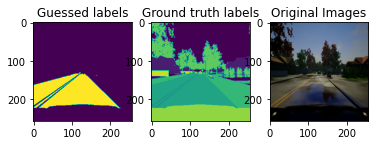

<ipython-input-35-15e4826f07e3>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.gcf().show()


<Figure size 432x288 with 0 Axes>

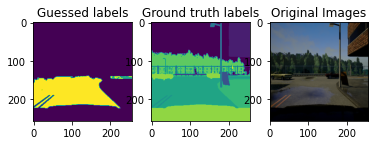

<Figure size 432x288 with 0 Axes>

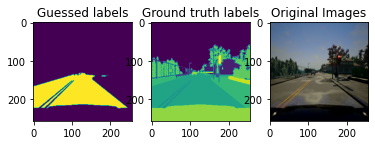

<Figure size 432x288 with 0 Axes>

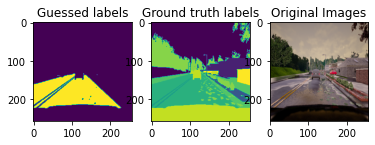

<Figure size 432x288 with 0 Axes>

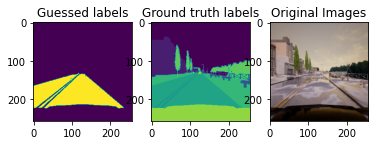

<Figure size 432x288 with 0 Axes>

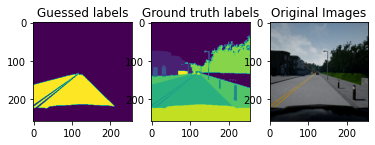

<Figure size 432x288 with 0 Axes>

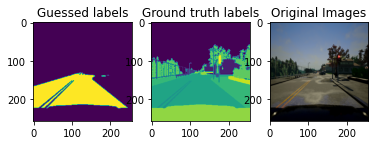

<Figure size 432x288 with 0 Axes>

In [35]:
for i, data in enumerate(test_data_loader):
    images, labels = data
    images = images.to(device)
    labels = labels.to(device)
    outputs = net(images)
    f, axarr = plt.subplots(1,3)

    for j in range(0,5):
        axarr[0].imshow(outputs.squeeze().detach().cpu().numpy()[j,7,:,:])
        axarr[0].set_title('Guessed labels')

        axarr[1].imshow(labels.detach().cpu().numpy()[j,:,:])
        axarr[1].set_title('Ground truth labels')

        original = get_orig(images[j].cpu())
        axarr[2].imshow(original)
        axarr[2].set_title('Original Images')
        plt.show()
        plt.gcf().show()
        if i>5:
            break

Стоит сказать что уже есть реализация Unet в PyTorch. Она и другие популярные модели для решения задачи сегментации находятся в библиотеке [segmentation_models_pytorch](https://segmentation-modelspytorch.readthedocs.io/en/latest/index.html)

Если у вас нет этой библиотеки, то для дальнейшей работы вам надо ее установить через pip

In [36]:
import segmentation_models_pytorch as smp

# создание модели
segmodel = smp.Unet()
segmodel = smp.Unet('resnet34', classes=13, activation='softmax').to(device)

epoch_losses = []

for epoch in range(2):  # loop over the dataset multiple times
    epoch_loss = []
    time1 = time.time()
    for i, data in enumerate(train_data_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)


        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = segmodel(inputs)
        loss = dice_loss(outputs,labels)
        loss.backward()
        optimizer.step()

        # print statistics
        epoch_loss.append(loss.item())
        print(f'batch index : {batch_idx} | loss : {loss.item()}')

    print(f'Epoch {epoch+1}, loss: ',np.mean(epoch_loss))
    time2 = time.time()
    print(f'Spend time for 1 epoch: {time2-time1} sec')
    
    epoch_losses.append(epoch_loss)

/home/bob/anaconda3/lib/python3.8/site-packages/segmentation_models_pytorch/base/modules.py:102: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)


batch index : 874 | loss : 0.8697865009307861
batch index : 874 | loss : 0.8695708513259888
batch index : 874 | loss : 0.8684853911399841
batch index : 874 | loss : 0.8681082129478455
batch index : 874 | loss : 0.8684852719306946
batch index : 874 | loss : 0.8680189847946167
batch index : 874 | loss : 0.8705576658248901
batch index : 874 | loss : 0.8677821755409241
batch index : 874 | loss : 0.869143009185791
batch index : 874 | loss : 0.869382381439209
batch index : 874 | loss : 0.8663759827613831
batch index : 874 | loss : 0.8703027963638306
batch index : 874 | loss : 0.8688459992408752
batch index : 874 | loss : 0.8677271008491516
batch index : 874 | loss : 0.8717591762542725
batch index : 874 | loss : 0.8681379556655884
batch index : 874 | loss : 0.8680678606033325
batch index : 874 | loss : 0.867387056350708
batch index : 874 | loss : 0.8674662709236145
batch index : 874 | loss : 0.8709976077079773
batch index : 874 | loss : 0.868429958820343
batch index : 874 | loss : 0.870472133

batch index : 874 | loss : 0.8698573708534241
batch index : 874 | loss : 0.8683465123176575
batch index : 874 | loss : 0.8670461177825928
batch index : 874 | loss : 0.8711622953414917
batch index : 874 | loss : 0.8701240420341492
batch index : 874 | loss : 0.8683921694755554
batch index : 874 | loss : 0.869757890701294
batch index : 874 | loss : 0.8682786822319031
batch index : 874 | loss : 0.8691760301589966
batch index : 874 | loss : 0.8684494495391846
batch index : 874 | loss : 0.8678982853889465
batch index : 874 | loss : 0.8666651844978333
batch index : 874 | loss : 0.8690794706344604
batch index : 874 | loss : 0.8707114458084106
batch index : 874 | loss : 0.8677732944488525
batch index : 874 | loss : 0.8669278621673584
batch index : 874 | loss : 0.8680000901222229
batch index : 874 | loss : 0.8699517250061035
batch index : 874 | loss : 0.8702796101570129
batch index : 874 | loss : 0.8702867031097412
batch index : 874 | loss : 0.8671076893806458
batch index : 874 | loss : 0.868043

batch index : 874 | loss : 0.8698023557662964
batch index : 874 | loss : 0.8695257902145386
batch index : 874 | loss : 0.8699741959571838
batch index : 874 | loss : 0.8678206205368042
batch index : 874 | loss : 0.8692429065704346
batch index : 874 | loss : 0.8719856142997742
batch index : 874 | loss : 0.8689777255058289
batch index : 874 | loss : 0.8685654401779175
batch index : 874 | loss : 0.8679727911949158
batch index : 874 | loss : 0.8684512376785278
batch index : 874 | loss : 0.8675984144210815
batch index : 874 | loss : 0.8702740669250488
batch index : 874 | loss : 0.8699133992195129
batch index : 874 | loss : 0.8682665228843689
batch index : 874 | loss : 0.8700882196426392
batch index : 874 | loss : 0.8719820380210876
batch index : 874 | loss : 0.8714414834976196
batch index : 874 | loss : 0.8700333833694458
batch index : 874 | loss : 0.8683951497077942
batch index : 874 | loss : 0.8690913319587708
batch index : 874 | loss : 0.8713554739952087
batch index : 874 | loss : 0.86755

batch index : 874 | loss : 0.8697155117988586
batch index : 874 | loss : 0.8694420456886292
batch index : 874 | loss : 0.8700068593025208
batch index : 874 | loss : 0.8706782460212708
batch index : 874 | loss : 0.8701879978179932
batch index : 874 | loss : 0.8683159351348877
batch index : 874 | loss : 0.8698325157165527
batch index : 874 | loss : 0.8682392835617065
batch index : 874 | loss : 0.8699589967727661
batch index : 874 | loss : 0.8694797158241272
batch index : 874 | loss : 0.8689929842948914
batch index : 874 | loss : 0.8700902462005615
batch index : 874 | loss : 0.8698328733444214
batch index : 874 | loss : 0.8680644035339355
batch index : 874 | loss : 0.8696408271789551
batch index : 874 | loss : 0.8689224720001221
batch index : 874 | loss : 0.869484543800354
batch index : 874 | loss : 0.8705894947052002
batch index : 874 | loss : 0.867530107498169
batch index : 874 | loss : 0.8709715604782104
batch index : 874 | loss : 0.8676572442054749
batch index : 874 | loss : 0.8678763

batch index : 874 | loss : 0.8694531917572021
batch index : 874 | loss : 0.8669466376304626
batch index : 874 | loss : 0.8692122101783752
batch index : 874 | loss : 0.8677886128425598
batch index : 874 | loss : 0.869057834148407
batch index : 874 | loss : 0.8671171069145203
batch index : 874 | loss : 0.8703657388687134
batch index : 874 | loss : 0.8682342767715454
batch index : 874 | loss : 0.8685286641120911
batch index : 874 | loss : 0.8680225610733032
batch index : 874 | loss : 0.8690436482429504
batch index : 874 | loss : 0.8699079155921936
batch index : 874 | loss : 0.8681809902191162
batch index : 874 | loss : 0.8678044676780701
batch index : 874 | loss : 0.8692921996116638
batch index : 874 | loss : 0.868747889995575
batch index : 874 | loss : 0.8685038685798645
batch index : 874 | loss : 0.8702685832977295
batch index : 874 | loss : 0.8701602220535278
batch index : 874 | loss : 0.8708206415176392
batch index : 874 | loss : 0.8697482347488403
batch index : 874 | loss : 0.8682034

batch index : 874 | loss : 0.8715838193893433
batch index : 874 | loss : 0.8687358498573303
batch index : 874 | loss : 0.8689842820167542
batch index : 874 | loss : 0.8709112405776978
batch index : 874 | loss : 0.8682258725166321
batch index : 874 | loss : 0.8679592609405518
batch index : 874 | loss : 0.8685842752456665
batch index : 874 | loss : 0.8693395256996155
batch index : 874 | loss : 0.8685613870620728
batch index : 874 | loss : 0.8701085448265076
batch index : 874 | loss : 0.8682489991188049
batch index : 874 | loss : 0.8684113025665283
batch index : 874 | loss : 0.8681080937385559
batch index : 874 | loss : 0.8677895069122314
batch index : 874 | loss : 0.8689477443695068
batch index : 874 | loss : 0.8674914836883545
batch index : 874 | loss : 0.8680863976478577
batch index : 874 | loss : 0.8683467507362366
batch index : 874 | loss : 0.8690822720527649
batch index : 874 | loss : 0.8699024319648743
batch index : 874 | loss : 0.8672565817832947
batch index : 874 | loss : 0.86954

batch index : 874 | loss : 0.8674331307411194
batch index : 874 | loss : 0.8684900999069214
batch index : 874 | loss : 0.8677552342414856
batch index : 874 | loss : 0.8718602657318115
batch index : 874 | loss : 0.8661673665046692
batch index : 874 | loss : 0.8701879978179932
batch index : 874 | loss : 0.8697549700737
batch index : 874 | loss : 0.8682951927185059
batch index : 874 | loss : 0.8684485554695129
batch index : 874 | loss : 0.8677664995193481
batch index : 874 | loss : 0.8691160678863525
batch index : 874 | loss : 0.8696876168251038
batch index : 874 | loss : 0.868619978427887
batch index : 874 | loss : 0.8686935901641846
batch index : 874 | loss : 0.868996262550354
batch index : 874 | loss : 0.8701058626174927
batch index : 874 | loss : 0.8689446449279785
batch index : 874 | loss : 0.8678191304206848
batch index : 874 | loss : 0.86866295337677
batch index : 874 | loss : 0.8697142601013184
batch index : 874 | loss : 0.8687632083892822
batch index : 874 | loss : 0.868915081024

batch index : 874 | loss : 0.8690330386161804
batch index : 874 | loss : 0.8677548170089722
batch index : 874 | loss : 0.8700246214866638
batch index : 874 | loss : 0.8690246939659119
batch index : 874 | loss : 0.8701656460762024
batch index : 874 | loss : 0.8687711358070374
batch index : 874 | loss : 0.8689743280410767
batch index : 874 | loss : 0.871537446975708
batch index : 874 | loss : 0.8689412474632263
batch index : 874 | loss : 0.8675885796546936
batch index : 874 | loss : 0.8678331971168518
batch index : 874 | loss : 0.8677583336830139
batch index : 874 | loss : 0.8695963621139526
batch index : 874 | loss : 0.8701440095901489
batch index : 874 | loss : 0.8693206310272217
batch index : 874 | loss : 0.870833158493042
batch index : 874 | loss : 0.8698628544807434
batch index : 874 | loss : 0.8703436851501465
batch index : 874 | loss : 0.8679850697517395
batch index : 874 | loss : 0.8683143258094788
batch index : 874 | loss : 0.867393970489502
batch index : 874 | loss : 0.86792391

batch index : 874 | loss : 0.8688193559646606
batch index : 874 | loss : 0.8688040375709534
batch index : 874 | loss : 0.8691728711128235
batch index : 874 | loss : 0.8684889078140259
batch index : 874 | loss : 0.8694800138473511
batch index : 874 | loss : 0.869484007358551
batch index : 874 | loss : 0.8696499466896057
batch index : 874 | loss : 0.8682590126991272
batch index : 874 | loss : 0.8678059577941895
batch index : 874 | loss : 0.8697749972343445
batch index : 874 | loss : 0.8706920742988586
batch index : 874 | loss : 0.8689562082290649
batch index : 874 | loss : 0.8701845407485962
batch index : 874 | loss : 0.8700045943260193
batch index : 874 | loss : 0.8693225979804993
batch index : 874 | loss : 0.8689271211624146
batch index : 874 | loss : 0.8703566789627075
batch index : 874 | loss : 0.8704451322555542
batch index : 874 | loss : 0.8675217628479004
batch index : 874 | loss : 0.867339551448822
batch index : 874 | loss : 0.8674676418304443
batch index : 874 | loss : 0.8721337

batch index : 874 | loss : 0.869035005569458
batch index : 874 | loss : 0.8692153096199036
batch index : 874 | loss : 0.8670974373817444
batch index : 874 | loss : 0.8692345023155212
batch index : 874 | loss : 0.86939936876297
batch index : 874 | loss : 0.8692238330841064
batch index : 874 | loss : 0.8684549927711487
batch index : 874 | loss : 0.86964350938797
batch index : 874 | loss : 0.868873119354248
batch index : 874 | loss : 0.867868185043335
batch index : 874 | loss : 0.8687215447425842
batch index : 874 | loss : 0.8695401549339294
batch index : 874 | loss : 0.8676771521568298
batch index : 874 | loss : 0.869692325592041
batch index : 874 | loss : 0.8696399331092834
batch index : 874 | loss : 0.8693560361862183
batch index : 874 | loss : 0.8696858882904053
batch index : 874 | loss : 0.8680008053779602
batch index : 874 | loss : 0.8679426908493042
batch index : 874 | loss : 0.8695160150527954
batch index : 874 | loss : 0.8685279488563538
batch index : 874 | loss : 0.8704608082771